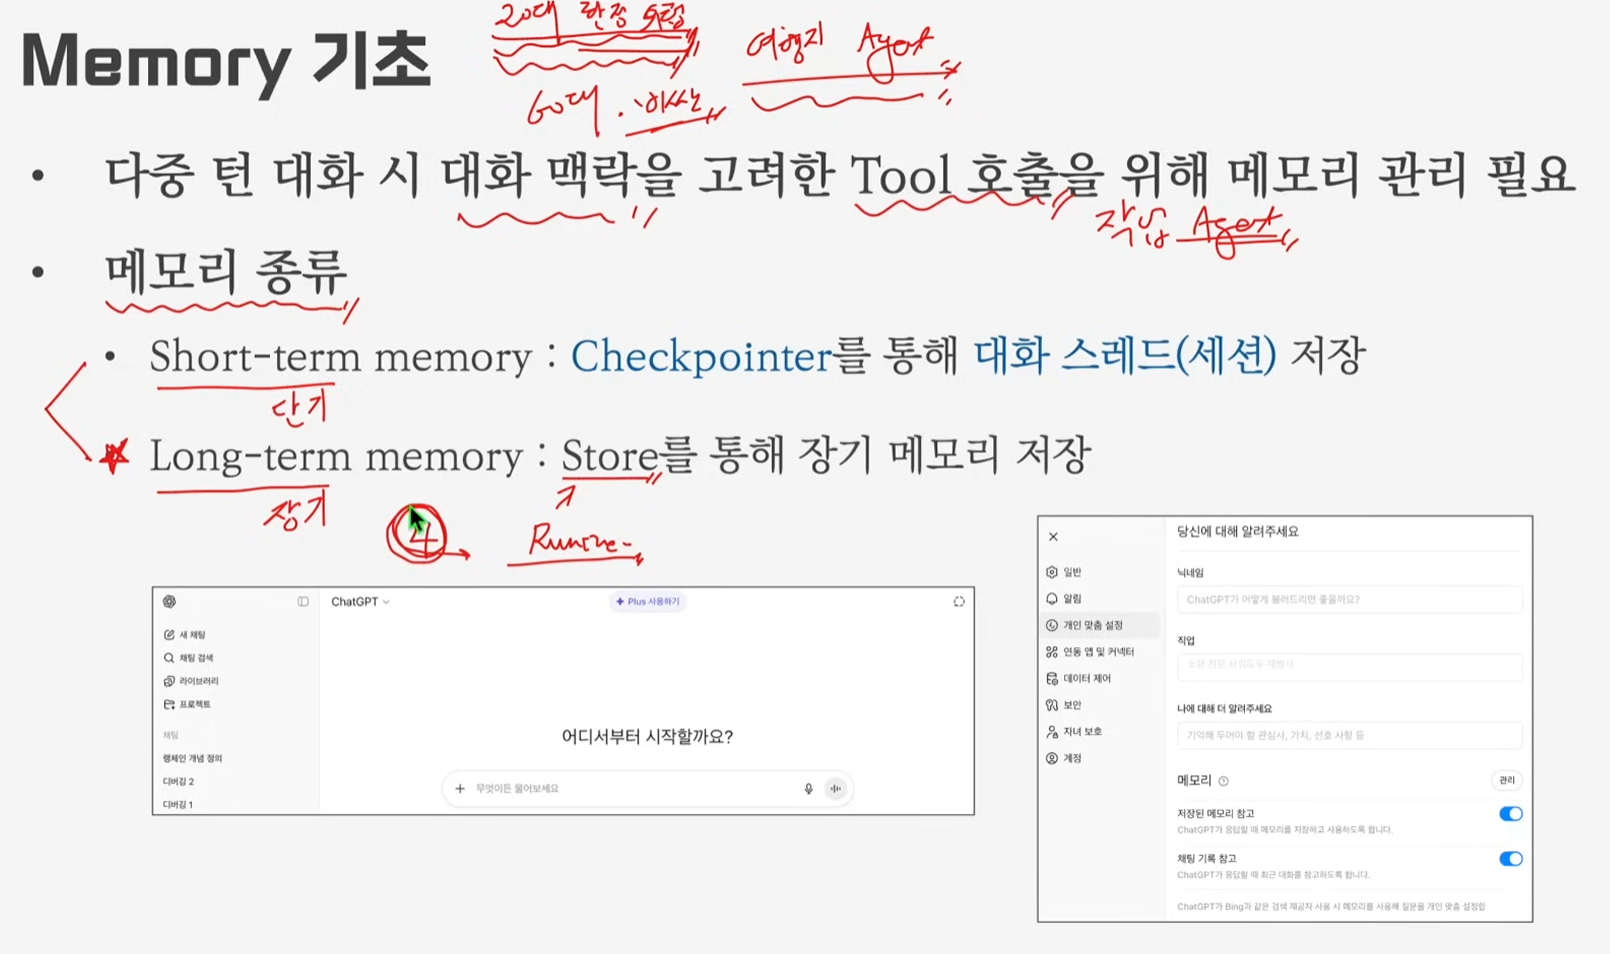

### 숏텀 메모리
- Chatgpt 에서 하나의 대화창
### 롱텀 메모리
- 챗지피티 맞춤설정에서 닉네임,직업,나에 대한 설명 등을 적은 것을 토대로 세션을 넘나들수 있는 메모리

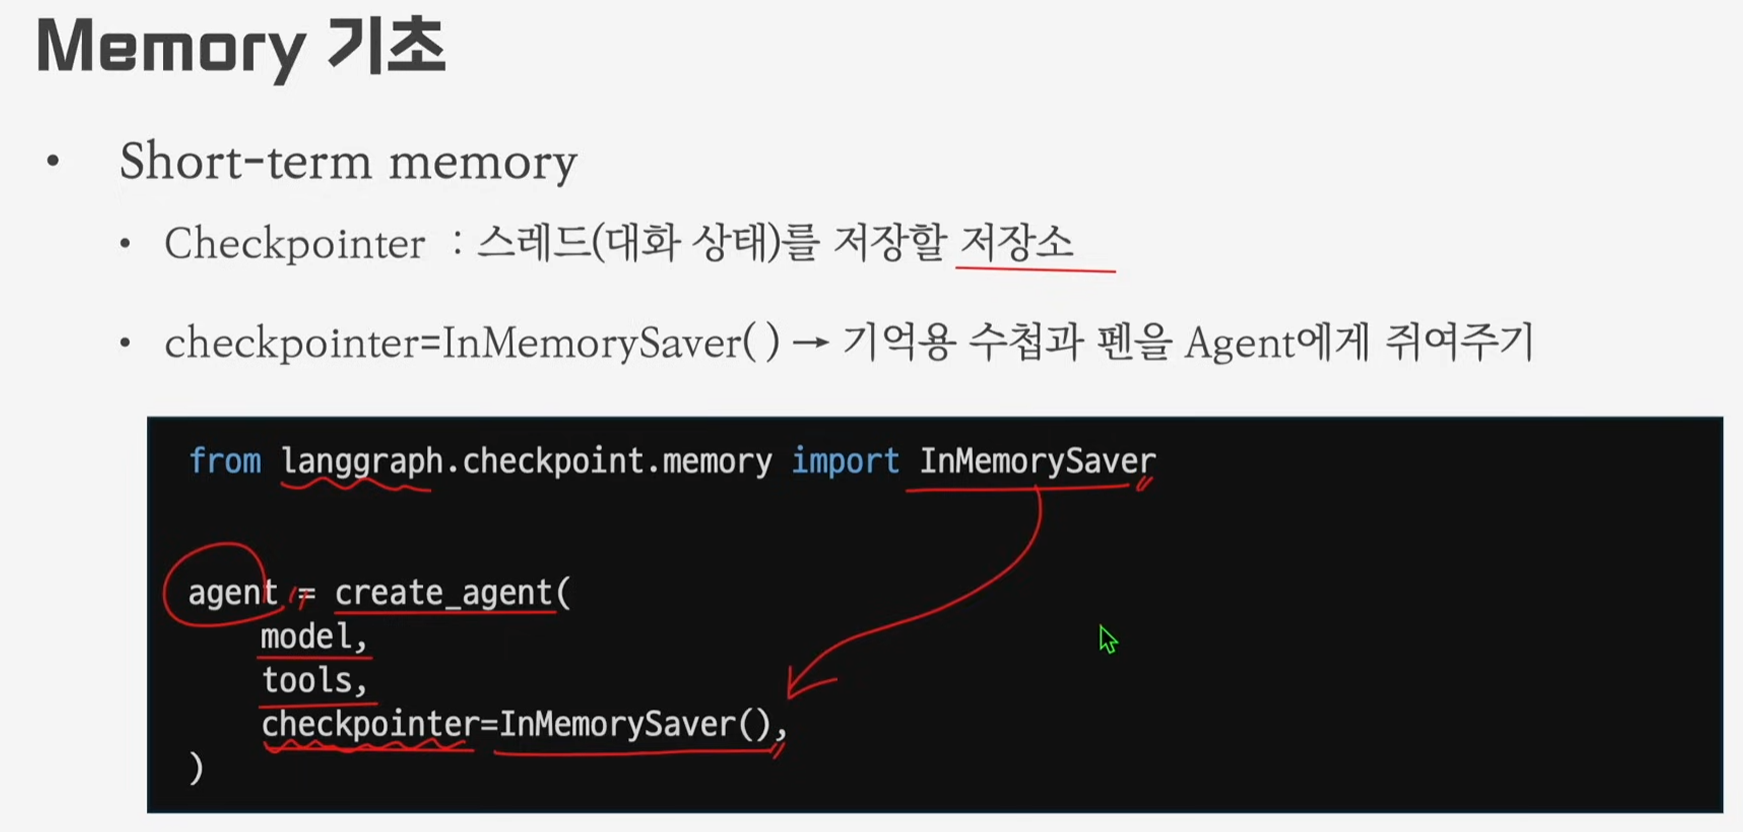

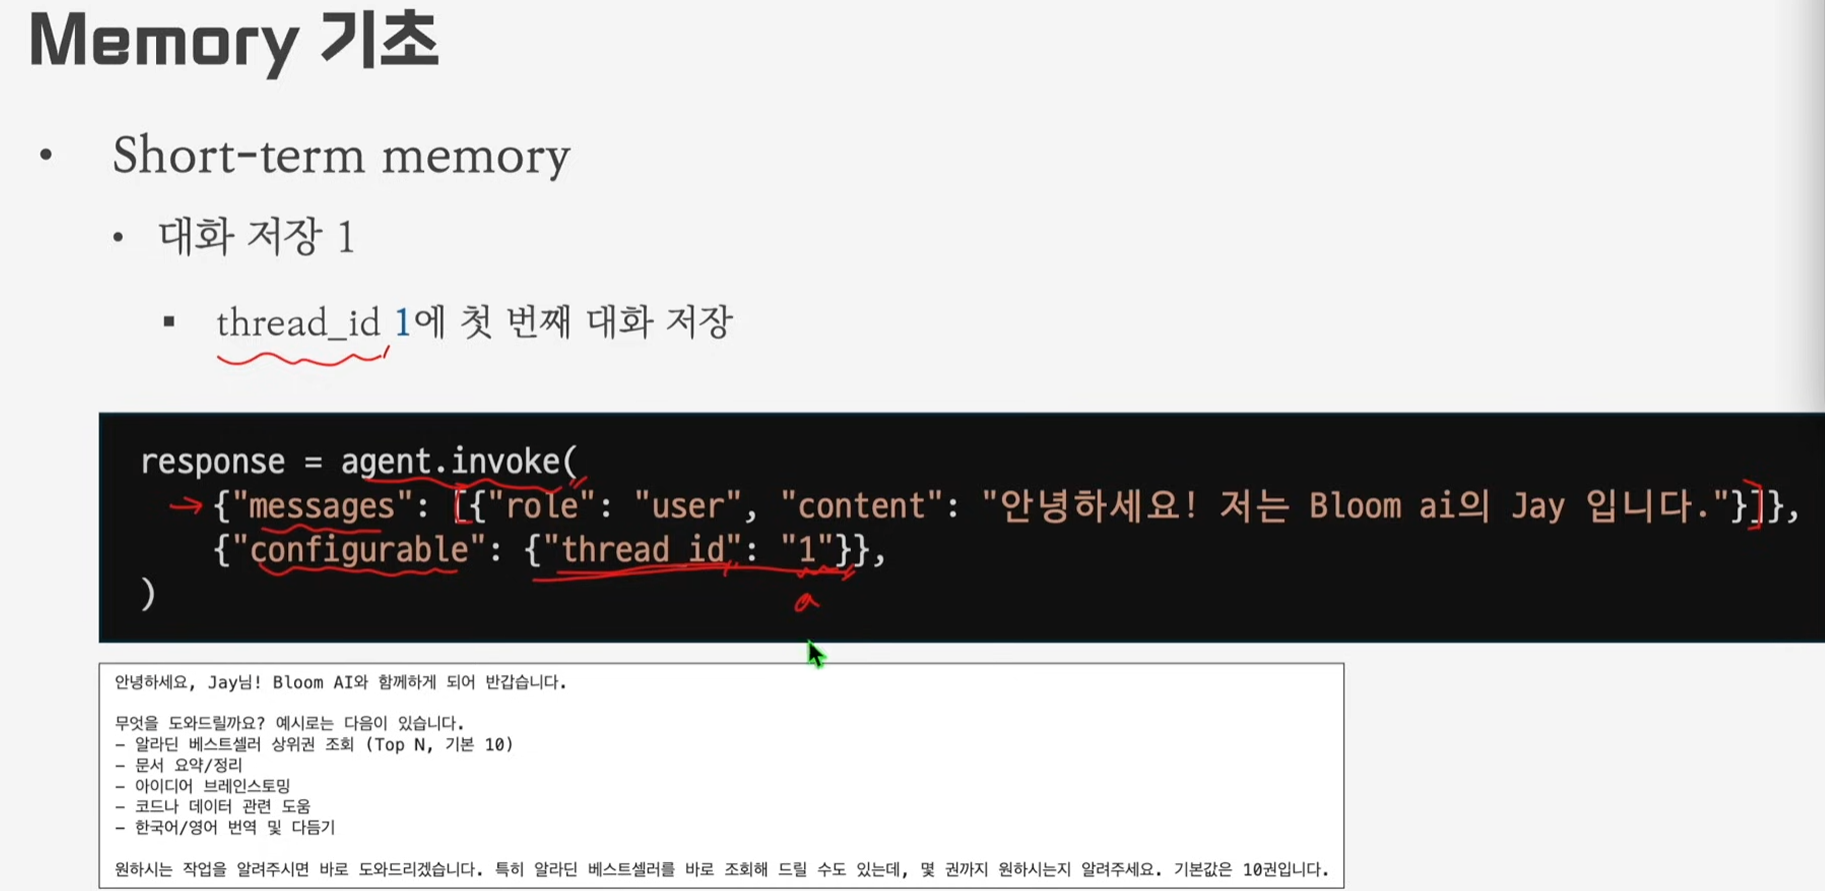
### thread_id 
- thread_id를 통해서 memory에 저장이 된다.
- 단, thread_id가 바뀌면 기억 손실

In [18]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
from langchain.tools import tool

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

model = init_chat_model("gpt-5-nano",
                        api_key=api_key)

In [21]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver

tools = []

agent = create_agent(model=model,
             tools=tools,
             checkpointer=InMemorySaver())

response = agent.invoke(
    {"messages":{"role": "user", "content": "안녕하세요. 저는 이스트소프트에 후추라고한단다."}},
    {"configurable": {"thread_id":"thread_1"}}
)


In [22]:
print(response['messages'][-1].content)

반갑습니다, 후추님. 이스트소프트에서 무엇을 도와드리면 좋을까요?

제가 도와드릴 수 있는 일들:
- 내부 문서나 고객지원 자료의 정리 및 초안 작성
- FAQ, 매뉴얼, 정책 문서 작성
- 발표자료, 이메일 초안, 회의록 정리
- 데이터 분석 리포트 초안 작성
- 코드 스니펫이나 간단한 자동화 스크립트 예시 제공
- 번역/로컬라이제이션(한국어↔영어)

원하는 형식이나 대상 독자, 필요 언어를 알려주시면 바로 맞춰 드리겠습니다. 몇 가지 예시도 드리면:
- 신제품 FAQ 5개 항목 작성
- 고객 문의 대응 스크립트 예시 1개 포맷
- 월간 리포트 초안 골격
- 부서 정책 안내서 요약본

지금 어떤 상황이거나 구체적인 목표가 있나요? 자세히 알려주시면 맞춤형으로 바로 도와드리겠습니다.


In [23]:
response = agent.invoke(
    {"messages":{"role": "user", "content": "내 이름이 뭐라고?"}},
    {"configurable": {"thread_id":"thread_1"}}
)
print(response['messages'][-1].content)

당신의 이름은 '후추'입니다. 원하시면 정중히 부를 때는 '후추님'으로, 편하게 부를 때는 '후추'로 부르겠습니다. 다른 호칭으로 바꾸고 싶으면 알려 주세요.


In [24]:
response = agent.invoke(
    {"messages":{"role": "user", "content": "내 이름이 뭐라고?"}},
    {"configurable": {"thread_id":"thread_2"}}
)
print(response['messages'][-1].content)

아직 제게 당신의 이름을 받지 못했어요. 이름을 알려주시면 그 이름으로 불러드릴게요. 원하시면 애칭도 함께 알려주세요.


In [25]:
response = agent.invoke(
    {"messages":{"role": "user", "content": "지금까지 무슨 얘길 했었냐 우리가?"}},
    {"configurable": {"thread_id":"thread_1"}}
)
print(response['messages'][-1].content)

다음과 같이 지금까지의 대화를 간단히 요약할게요.

- 당신은 이스트소프트의 '후추'로 활동 중이라고 소개하셨습니다.
- 제가 도와드릴 수 있는 업무 범위를 제시했습니다: 내부 문서/고객지원 자료의 정리 및 초안 작성, FAQ/매뉴얼/정책 문서, 발표자료·이메일·회의록, 데이터 분석 리포트 초안, 코드 스니펫이나 자동화 스크립트 예시, 번역/로컬라이제이션.
- 원하시는 형식이나 대상 독자, 필요 언어를 알려주시면 바로 맞춤으로 도와드리겠다고 안내드렸고, 예시도 몇 가지 드렸습니다(신제품 FAQ 5개, 고객 문의 대응 스크립트 예시, 월간 리포트 골격, 부서 정책 요약본 등).
- 당신의 이름은 '후추'이며, 부를 때는 '후추님'으로도 부를 수 있고 원하시면 다른 호칭으로 바꿔드리겠다고 약속했습니다.

지금 바로 어떤 작업부터 시작하고 싶으신가요? 구체적인 목표나 형식, 독자 등을 알려주시면 바로 초안을 만들어 드리겠습니다.


In [26]:
for i, msg in enumerate(response['messages']):
    print(f"---{i+1}---Message ")
    print(msg.content+"\n")

---1---Message 
안녕하세요. 저는 이스트소프트에 후추라고한단다.

---2---Message 
반갑습니다, 후추님. 이스트소프트에서 무엇을 도와드리면 좋을까요?

제가 도와드릴 수 있는 일들:
- 내부 문서나 고객지원 자료의 정리 및 초안 작성
- FAQ, 매뉴얼, 정책 문서 작성
- 발표자료, 이메일 초안, 회의록 정리
- 데이터 분석 리포트 초안 작성
- 코드 스니펫이나 간단한 자동화 스크립트 예시 제공
- 번역/로컬라이제이션(한국어↔영어)

원하는 형식이나 대상 독자, 필요 언어를 알려주시면 바로 맞춰 드리겠습니다. 몇 가지 예시도 드리면:
- 신제품 FAQ 5개 항목 작성
- 고객 문의 대응 스크립트 예시 1개 포맷
- 월간 리포트 초안 골격
- 부서 정책 안내서 요약본

지금 어떤 상황이거나 구체적인 목표가 있나요? 자세히 알려주시면 맞춤형으로 바로 도와드리겠습니다.

---3---Message 
내 이름이 뭐라고?

---4---Message 
당신의 이름은 '후추'입니다. 원하시면 정중히 부를 때는 '후추님'으로, 편하게 부를 때는 '후추'로 부르겠습니다. 다른 호칭으로 바꾸고 싶으면 알려 주세요.

---5---Message 
지금까지 무슨 얘길 했었냐 우리가?

---6---Message 
다음과 같이 지금까지의 대화를 간단히 요약할게요.

- 당신은 이스트소프트의 '후추'로 활동 중이라고 소개하셨습니다.
- 제가 도와드릴 수 있는 업무 범위를 제시했습니다: 내부 문서/고객지원 자료의 정리 및 초안 작성, FAQ/매뉴얼/정책 문서, 발표자료·이메일·회의록, 데이터 분석 리포트 초안, 코드 스니펫이나 자동화 스크립트 예시, 번역/로컬라이제이션.
- 원하시는 형식이나 대상 독자, 필요 언어를 알려주시면 바로 맞춤으로 도와드리겠다고 안내드렸고, 예시도 몇 가지 드렸습니다(신제품 FAQ 5개, 고객 문의 대응 스크립트 예시, 월간 리포트 골격, 부서 정책 요약본 등).
- 당신의 이름은 '후추'이며, 부를 때는 '후추님'으로도 부를 수 있

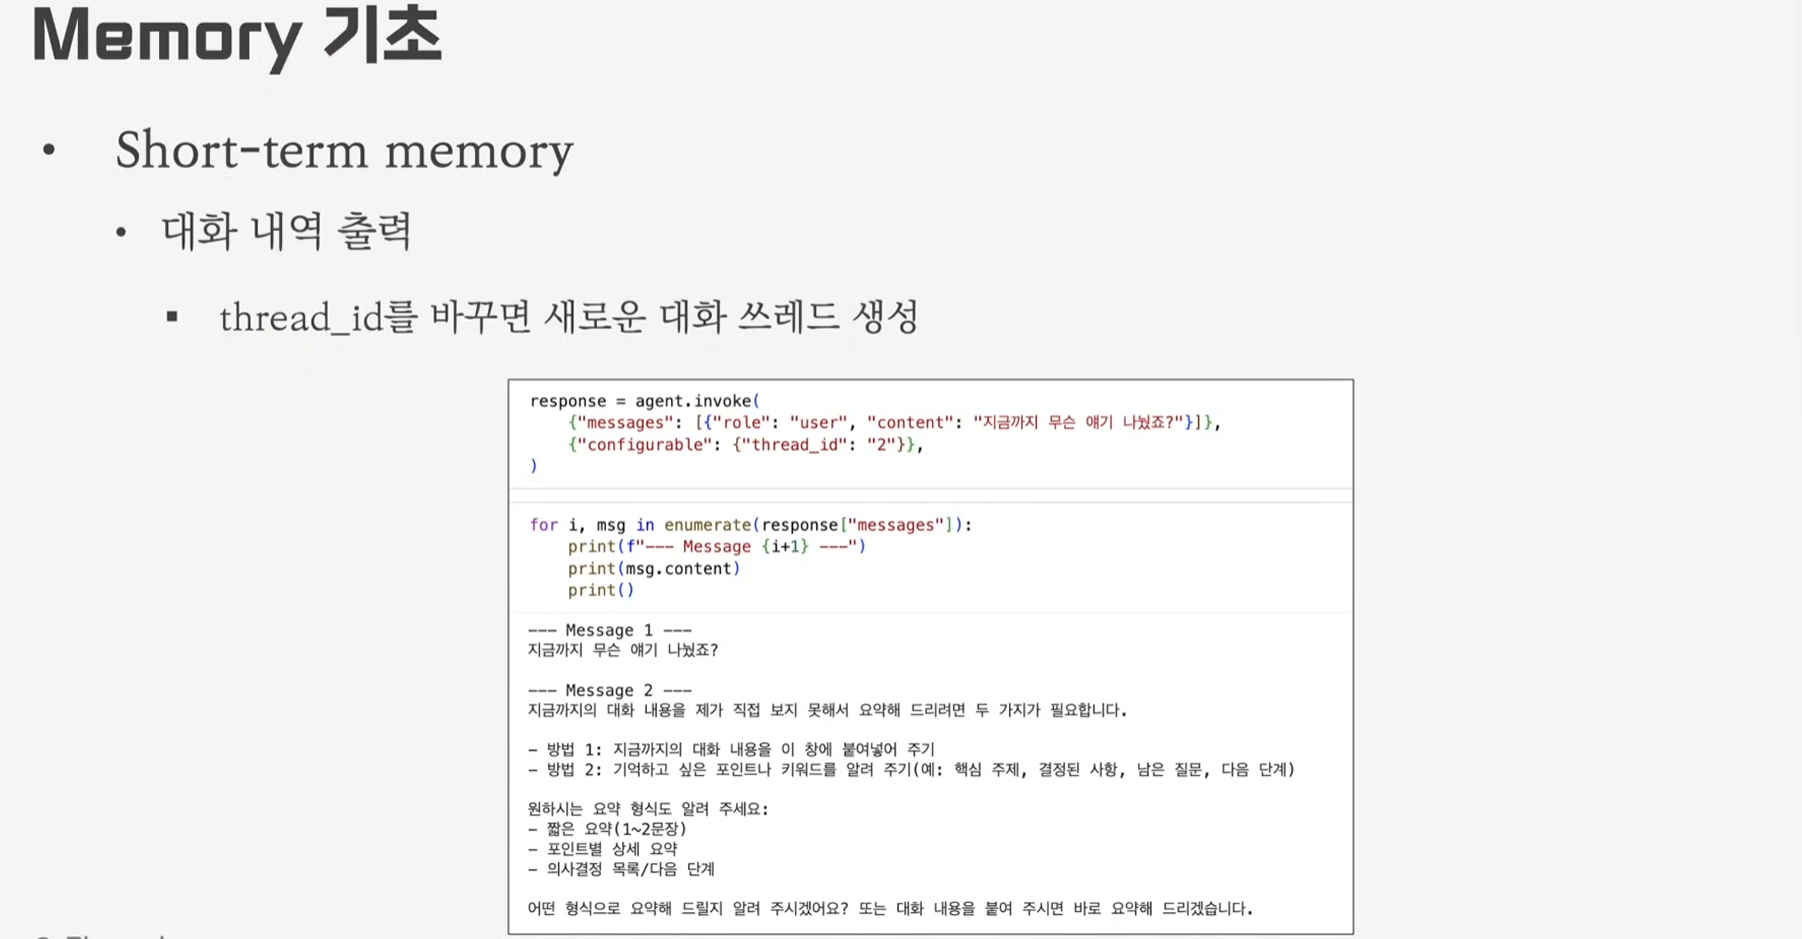